## Part 1: For Normal Distribution Case: Assuming normal Distribution for fx and fe:

In [1]:
# import packages:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## (a): Properties of OLS estimators:

- The theoretical properties of the OLS estimators alpha-hat and beta-hat are: both estimators are Linear, unbiased (both of them approach True Beta and alpha), efficient (least variance among all unbiased estimators) and homoskedastic, implying that there is no autocorrelation thus exogenous, and consistent.

- The theoretical distrinution of both estimators is normal with mean 1, hence, as n tends to infinity then it is asympotically normal.

## (b) and (c): Calculating Alpha-hat, Beta-hat, Mean, Standard Deviation, and Plotting:

In [2]:
M = 5000
n = 50

In [3]:
def func_1(M,n):
    # part b:
    alpha = 1 
    beta = 1
    α = np.ones((M,n))
    y = np.zeros((M,n))
    x = np.random.normal(0,1,(M,n))
    e = np.random.normal(0,1,(M,n))
    for i in range(len(x)):
        for j in range(len(x[i])):
            y[i][j] = alpha + beta*(x[i][j]) +e[i][j]
            
    # calculating alpha and beta
    betaMatrix = []
    sigmaY = []
    for i in range(len(x)):
        dfα = pd.DataFrame(α[i])
        dfα["1"] = x[i] 
        betaMatrix.append(((np.linalg.inv((dfα.transpose()).dot(dfα)))).dot(dfα.transpose()).dot(pd.DataFrame(y[i])))
    
        #Calculate Errors
        
        errors = np.subtract(pd.DataFrame(y[i]),dfα.dot(betaMatrix[i])) 
        errorsSquared = np.power(errors, 2) 
        
        # Calculate Variance, Covariance and Sigma
        
        variance = (errorsSquared.sum(axis=0))/M 
        covarianceMatrixY = variance[0]*(np.linalg.inv((dfα.transpose()).dot(dfα))) 
        sigmaY.append(np.sqrt(np.diag(covarianceMatrixY)))
    # mean
    betaMatrix = np.swapaxes(betaMatrix,0,1)
    meanMatrix = []
    meanMatrix.append(np.mean(betaMatrix[0]))
    meanMatrix.append(np.mean(betaMatrix[1]))
    
    # std
    stdMatrix = []
    stdMatrix.append(np.std(betaMatrix[0]))
    stdMatrix.append(np.std(betaMatrix[1]))
    
    return betaMatrix, sigmaY, meanMatrix, stdMatrix


In [4]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_1(M,n)

In [5]:
print("\nThis is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:\n")
print(betaMatrix)
print("\nThis is Standard error: This is a sample of the std (since printing it all out will take so many pages) \n")
print(sigmaY[0:50])
print("\nThis is meanMatrix\n")
print(meanMatrix)
print("\nThis is stdMatrix\n")
print(stdMatrix)


This is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:

[[[1.08121865]
  [0.85316217]
  [1.24061544]
  ...
  [0.95308777]
  [0.84951721]
  [0.96541692]]

 [[0.93260538]
  [1.21904458]
  [1.13851191]
  ...
  [1.03062811]
  [0.94603704]
  [0.9031959 ]]]

This is Standard error: This is a sample of the std (since printing it all out will take so many pages) 

[array([0.01453649, 0.01240258]), array([0.01471554, 0.01384362]), array([0.01370343, 0.0135373 ]), array([0.01602827, 0.0140498 ]), array([0.0133746 , 0.01205914]), array([0.01425539, 0.01431567]), array([0.01389382, 0.0156748 ]), array([0.01163674, 0.01063297]), array([0.01148986, 0.01268722]), array([0.01557738, 0.01369278]), array([0.01293857, 0.01370328]), array([0.01267228, 0.01310837]), array([0.01582173, 0.01801288]), array([0.01251674, 0.00980061]), array([0.01399808, 0.01419506]), array([0.01472308, 0.0147767 ]), array([0.0123924 , 0.01432148]), array([0.01468047, 0.01745571]), array([0.0144339 , 0.01729

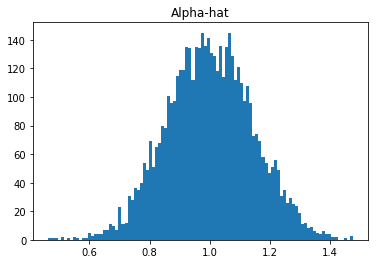

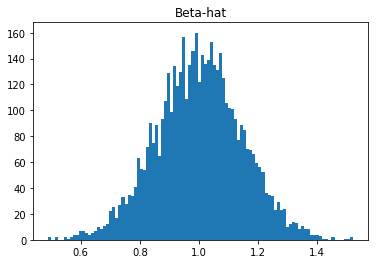

In [6]:
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

## (d): Comparison:

- The  distribution of the simulated alpha and beta is exactly similar to the theoretical distribution of the OLS estimators; where they are normal with mean 1 like the True Alpha and Beta.

## Part 2: For Normal Distribution Case: Assuming normal Distribution for fx and fe; however, in this case, there correlated with a factor of 0.5:

## (a): Properties of OLS estimators:


- The theoretical properties of the OLS estimators alpha-hat and beta-hat are: 

    - For Beta-hat: linear, biased (beta hat is equal to 1.5 however beta is 1), heteroskedastic and endogenous (there is correlation), efficient, and not consistent.     
    - For Alpha-hat: Linear, unbiased (approach True alpha), efficient, homoskedastic, implying that there is no autocorrelation thus exogenous, and consistent.
    
- The theoretical distrinution of both estimators is normal, hence, as n tends to infinity then it is asympotically normal.

## (b) and (c): Calculating Alpha-hat, Beta-hat, Mean, Standard Deviation, and Plotting:

In [7]:
cov = [[1,0.5],[0.5,1]]

In [8]:

def func_2(M,n):
    # part b:
    alpha = 1 
    beta = 1
    α = np.ones((M,n))
    y = np.zeros((M,n))
    x=(np.random.multivariate_normal([0,0], cov, size = (M,n)))
    x=np.swapaxes(x,0,2)
    x=np.swapaxes(x,1,2)
    x_corr = x[0]
    e_corr = x[1]
    for i in range(len(x_corr)):
        for j in range(len(x_corr[i])):
            y[i][j] = alpha + beta*(x_corr[i][j]) +e_corr[i][j]
            
    # calculating alpha and beta
    betaMatrix = []
    sigmaY = []
    for i in range(len(x_corr)):
        dfα = pd.DataFrame(α[i])
        dfα["1"] = x_corr[i] 
        betaMatrix.append(((np.linalg.inv((dfα.transpose()).dot(dfα)))).dot(dfα.transpose()).dot(pd.DataFrame(y[i])))
    
        #Calculate Errors
        
        errors = np.subtract(pd.DataFrame(y[i]),dfα.dot(betaMatrix[i])) 
        errorsSquared = np.power(errors, 2) 
        
        # Calculate Variance, Covariance and Sigma
        
        variance = (errorsSquared.sum(axis=0))/n 
        covarianceMatrixY = variance[0]*(np.linalg.inv((dfα.transpose()).dot(dfα))) 
        sigmaY.append(np.sqrt(np.diag(covarianceMatrixY)))
    # mean
    betaMatrix = np.swapaxes(betaMatrix,0,1)
    meanMatrix = []
    meanMatrix.append(np.mean(betaMatrix[0]))
    meanMatrix.append(np.mean(betaMatrix[1]))
    
    # std
    stdMatrix = []
    stdMatrix.append(np.std(betaMatrix[0]))
    stdMatrix.append(np.std(betaMatrix[1]))
    
    return betaMatrix, sigmaY, meanMatrix, stdMatrix



In [9]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_2(M,n)

In [10]:
print("\nThis is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:\n")
print(betaMatrix)
print("\nThis is Standard error: This is a sample of the std (since printing it all out will take so many pages) \n")
print(sigmaY[0:50])
print("\nThis is meanMatrix\n")
print(meanMatrix)
print("\nThis is stdMatrix\n")
print(stdMatrix)


This is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:

[[[0.81288785]
  [0.99203927]
  [0.78911338]
  ...
  [1.10596906]
  [1.09394272]
  [1.02916594]]

 [[1.42147711]
  [1.5922501 ]
  [1.47039992]
  ...
  [1.46951078]
  [1.46442101]
  [1.36611037]]]

This is Standard error: This is a sample of the std (since printing it all out will take so many pages) 

[array([0.11638837, 0.10491715]), array([0.13389528, 0.15076747]), array([0.11758281, 0.13184802]), array([0.12152105, 0.12289598]), array([0.13379389, 0.15256048]), array([0.11184303, 0.11919058]), array([0.12129169, 0.14303422]), array([0.11313614, 0.0995807 ]), array([0.10505234, 0.09469229]), array([0.11252412, 0.1036939 ]), array([0.11356685, 0.10790114]), array([0.09987814, 0.0972357 ]), array([0.13121548, 0.12752513]), array([0.10002361, 0.09623278]), array([0.11363872, 0.12694874]), array([0.12914313, 0.1461251 ]), array([0.12256913, 0.11428548]), array([0.11387887, 0.10969582]), array([0.14122936, 0.17909

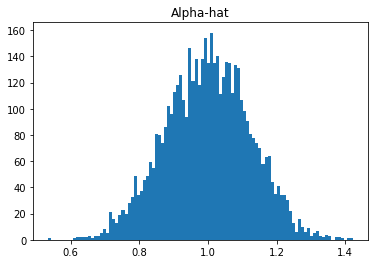

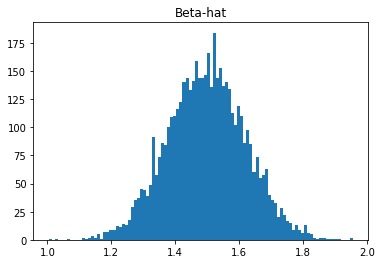

In [11]:
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

## Part (d): Comparison:

- The theoretical distribution of the estimated alpha and beta are approaching the normal distribution; however we have the biaseness of Beta-hat, 1.5 instead of 1.

## Part 3: For T Distribution Case: Assuming T Distribution for fx and fe, with DoF=5:


## (a): Properties of OLS estimators:

- The theoretical properties of the OLS estimators alpha-hat and beta-hat are: both estimators are Linear, unbiased (both of them approach True Beta and alpha), efficient (least variance among all unbiased estimators) and homoskedastic, implying that there is no autocorrelation thus exogenous, and consistent.

- The theoretical distrinution of both estimators is normal with mean 1, hence, as n tends to infinity then it is asympotically normal.

## (b) and (c): Calculating Alpha-hat, Beta-hat, Mean, Standard Deviation, and Plotting:

In [12]:
def func_3(M,n):
    # part b:
    alpha = 1 
    beta = 1
    α = np.ones((M,n))
    y = np.zeros((M,n))
    x = np.random.standard_t(5,(M,n))
    e = np.random.standard_t(5,(M,n))
    for i in range(len(x)):
        for j in range(len(x[i])):
            y[i][j] = alpha + beta*(x[i][j]) +e[i][j]
            
    # calculating alpha and beta
    betaMatrix = []
    sigmaY = []
    for i in range(len(x)):
        dfα = pd.DataFrame(α[i])
        dfα["1"] = x[i] 
        betaMatrix.append(((np.linalg.inv((dfα.transpose()).dot(dfα)))).dot(dfα.transpose()).dot(pd.DataFrame(y[i])))
    
        #Calculate Errors
        
        errors = np.subtract(pd.DataFrame(y[i]),dfα.dot(betaMatrix[i])) 
        errorsSquared = np.power(errors, 2) 
        
        # Calculate Variance, Covariance and Sigma
        
        variance = (errorsSquared.sum(axis=0))/n 
        covarianceMatrixY = variance[0]*(np.linalg.inv((dfα.transpose()).dot(dfα))) 
        sigmaY.append(np.sqrt(np.diag(covarianceMatrixY)))
    # mean
    betaMatrix = np.swapaxes(betaMatrix,0,1)
    meanMatrix = []
    meanMatrix.append(np.mean(betaMatrix[0]))
    meanMatrix.append(np.mean(betaMatrix[1]))
    
    # std
    stdMatrix = []
    stdMatrix.append(np.std(betaMatrix[0]))
    stdMatrix.append(np.std(betaMatrix[1]))
    
    return betaMatrix, sigmaY, meanMatrix, stdMatrix


In [13]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_3(M,n)

In [14]:
print("\nThis is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:\n")
print(betaMatrix)
print("\nThis is Standard error: This is a sample of the std (since printing it all out will take so many pages) \n")
print(sigmaY[0:50])
print("\nThis is meanMatrix\n")
print(meanMatrix)
print("\nThis is stdMatrix\n")
print(stdMatrix)


This is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:

[[[1.21820167]
  [1.23084984]
  [0.90854707]
  ...
  [0.8867861 ]
  [0.84734161]
  [1.05409868]]

 [[1.08727601]
  [1.13630818]
  [0.84326667]
  ...
  [0.67985515]
  [1.06502625]
  [0.98596385]]]

This is Standard error: This is a sample of the std (since printing it all out will take so many pages) 

[array([0.1706749 , 0.13143222]), array([0.21293586, 0.19752332]), array([0.19393962, 0.13856022]), array([0.18006921, 0.14944902]), array([0.16551031, 0.09682148]), array([0.16279135, 0.11267061]), array([0.18441397, 0.16126661]), array([0.17388794, 0.15176623]), array([0.19669312, 0.13048137]), array([0.17356803, 0.1675677 ]), array([0.2123198 , 0.18063893]), array([0.1512501 , 0.09239495]), array([0.16707017, 0.18062906]), array([0.17723991, 0.16050202]), array([0.16838227, 0.10290339]), array([0.23581493, 0.14147086]), array([0.15079224, 0.11779614]), array([0.19647829, 0.14546175]), array([0.1524413 , 0.09108

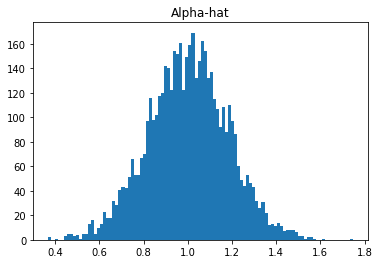

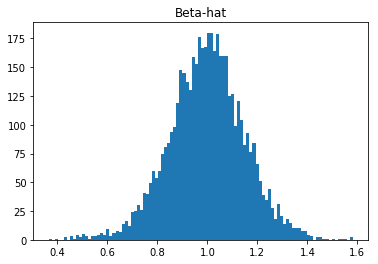

In [15]:
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

## Part (d): Comparison:

- The theoretical distribution of the estimated alpha and beta are approaching the normal distribution; where we have both, beta-hat and alpha-hat approaches True 1.

## Part 4: For Uniform Distribution Case: Assuming Uniform Distribution for fx and fe,         with U ~[0,1]:

## (a): Properties of OLS estimators:


- The theoretical properties of the OLS estimators alpha-hat and beta-hat are: 

    - For Alpha-hat: linear, biased (Alpha hat is equal to 1.5 however Alpha is 1), heteroskedastic and endogenous (there is correlation), efficient, and not consistent.     
    - For Beta-hat: Linear, unbiased (approach True Beta), homoskedastic, implying that there is no autocorrelation thus exogenous, and consistent.
    
- The theoretical distrinution of both estimators is normal, hence, as n tends to infinity then it is asympotically normal.

## (b) and (c): Calculating Alpha-hat, Beta-hat, Mean, Standard Deviation, and Plotting:

In [16]:
def func_4(M,n):
    # part b:
    alpha = 1 
    beta = 1
    α = np.ones((M,n))
    y = np.zeros((M,n))
    x = np.random.uniform(0,1,(M,n))
    e = np.random.uniform(0,1,(M,n))
    
    for i in range(len(x)):
        for j in range(len(x[i])):
            y[i][j] = alpha + beta*(x[i][j]) +e[i][j]
            
    # calculating alpha and beta
    betaMatrix = []
    sigmaY = []
    for i in range(len(x)):
        dfα = pd.DataFrame(α[i])
        dfα["1"] = x[i] 
        betaMatrix.append(((np.linalg.inv((dfα.transpose()).dot(dfα)))).dot(dfα.transpose()).dot(pd.DataFrame(y[i])))
    
        #Calculate Errors
        
        errors = np.subtract(pd.DataFrame(y[i]),dfα.dot(betaMatrix[i])) 
        errorsSquared = np.power(errors, 2) 
        
        # Calculate Variance, Covariance and Sigma
        
        variance = (errorsSquared.sum(axis=0))/n 
        covarianceMatrixY = variance[0]*(np.linalg.inv((dfα.transpose()).dot(dfα))) 
        sigmaY.append(np.sqrt(np.diag(covarianceMatrixY)))
    # mean
    betaMatrix = np.swapaxes(betaMatrix,0,1)
    meanMatrix = []
    meanMatrix.append(np.mean(betaMatrix[0]))
    meanMatrix.append(np.mean(betaMatrix[1]))
    
    # std
    stdMatrix = []
    stdMatrix.append(np.std(betaMatrix[0]))
    stdMatrix.append(np.std(betaMatrix[1]))
    
    return betaMatrix, sigmaY, meanMatrix, stdMatrix


In [17]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_4(M,n)

In [18]:
print("\nThis is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:\n")
print(betaMatrix)
print("\nThis is Standard error: This is a sample of the std (since printing it all out will take so many pages) \n")
print(sigmaY[0:50])
print("\nThis is meanMatrix\n")
print(meanMatrix)
print("\nThis is stdMatrix\n")
print(stdMatrix)


This is BetaMatrix: Containing Both, Beta-hat and Alpha-hat in one Array:

[[[1.51459842]
  [1.52040073]
  [1.62888046]
  ...
  [1.56388316]
  [1.4013267 ]
  [1.50342965]]

 [[0.92879914]
  [1.01307437]
  [0.91952866]
  ...
  [0.71491186]
  [1.13732122]
  [0.88565809]]]

This is Standard error: This is a sample of the std (since printing it all out will take so many pages) 

[array([0.07743108, 0.14317678]), array([0.0870235 , 0.15173961]), array([0.07706256, 0.13625736]), array([0.08336824, 0.14955651]), array([0.08207341, 0.13948354]), array([0.09708216, 0.16442974]), array([0.07495429, 0.13760619]), array([0.09190416, 0.15047077]), array([0.08587218, 0.14984148]), array([0.0668416 , 0.10941772]), array([0.08037485, 0.1423905 ]), array([0.08241659, 0.14479373]), array([0.074359 , 0.1333472]), array([0.08188352, 0.15691495]), array([0.08625966, 0.16935841]), array([0.0893483 , 0.15848246]), array([0.06679767, 0.13152735]), array([0.09073999, 0.13608509]), array([0.07396399, 0.1385584

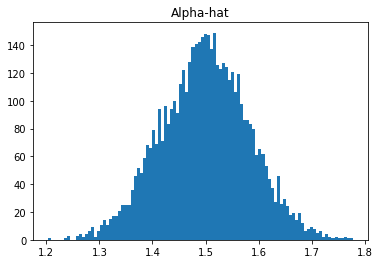

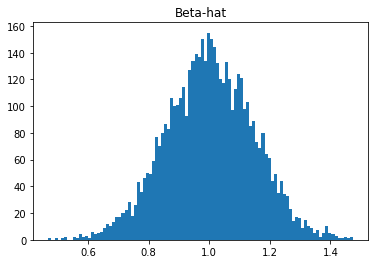

In [19]:
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

## Part (d): Comparison:

- The theoretical distribution of the estimated alpha and beta are approaching the normal distribution; however we have the biaseness of Alpha-hat, 1.5 instead of 1.

## Part 5: We will conduct the following pattern on the four given different distributions: where we will be testing for N= 25 and N=100.

### A- For Normal Distribution:

#### For N = 25

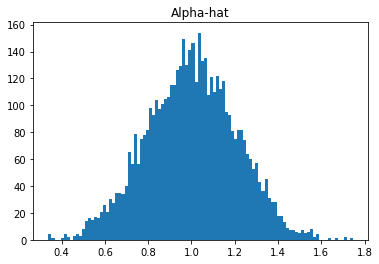

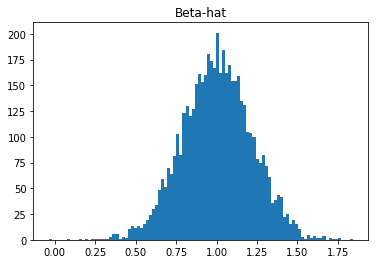

In [20]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_1(M,25)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

#### For N = 100

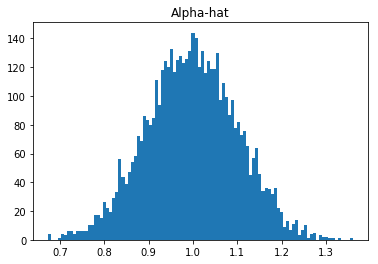

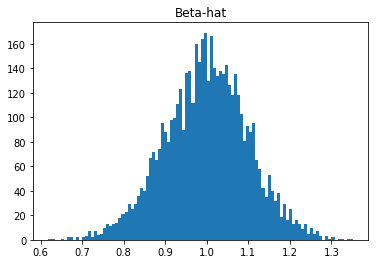

In [21]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_1(M,100)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

- For the normal distribution, as n increases, the estimators, alpha and beta, approach normal distribution; however, this approach is accompanied with tighter distribution as n increases.

### B- For Normal Distribution, with correlation factor of 0.5:

#### For N = 25

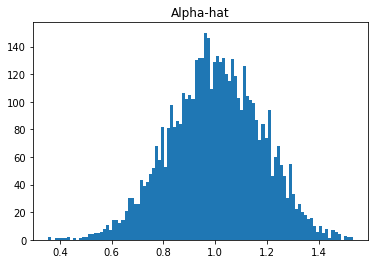

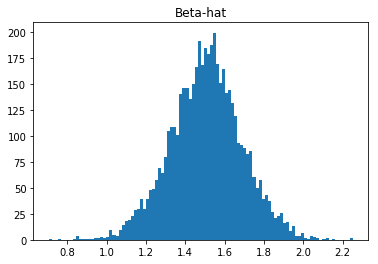

In [22]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_2(M,25)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

#### For N = 100

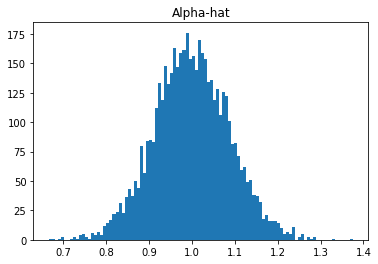

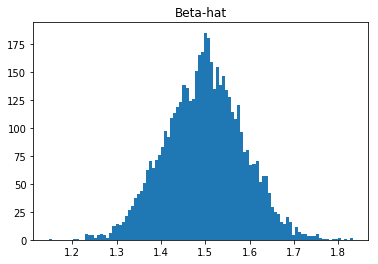

In [23]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_2(M,100)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

- There is no major difference as n increases; however, the distribution becomes tighter and Beta-hat is still biased.

### C- For T-Distribution, DoF=5:

#### For N=25:

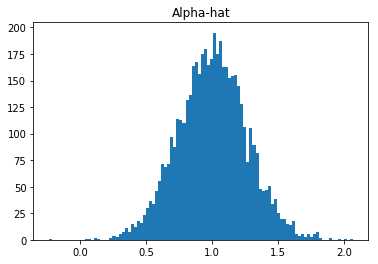

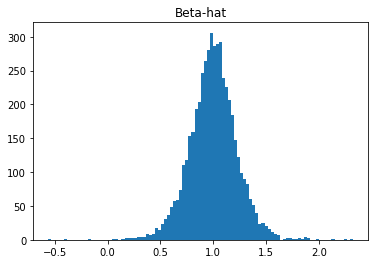

In [24]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_3(M,25)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

#### For N=100:

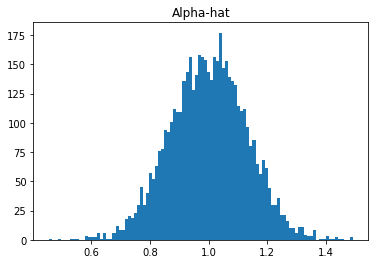

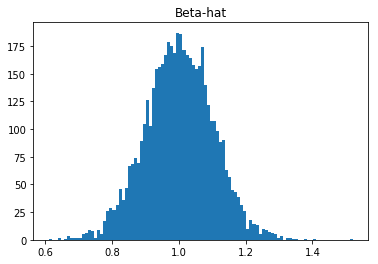

In [25]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_3(M,100)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

- For the T - distribution, as n increases, the estimators, alpha and beta, approach normal distribution.

- It approaches a normal distribution as N increases, this can seen as the tials are getting narrower. 


### D- For Uniform Distribution: U ~ [0,1]:

#### For N = 25:

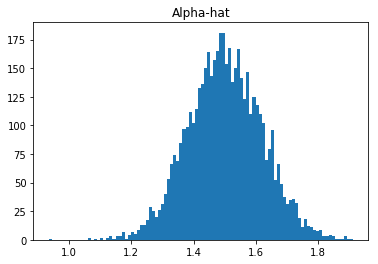

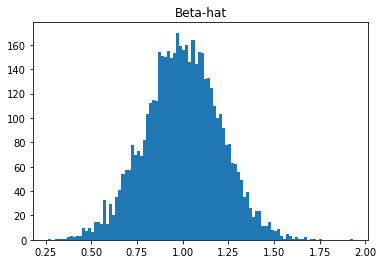

In [26]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_4(M,25)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

#### For N = 100:

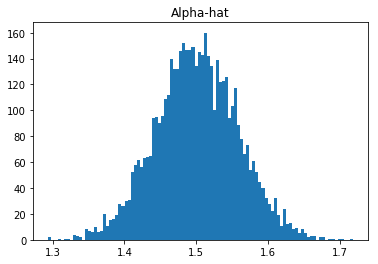

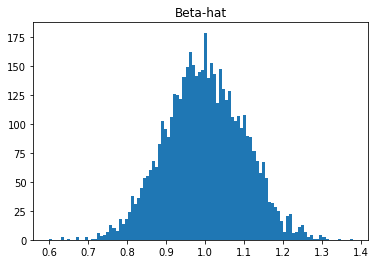

In [27]:
betaMatrix, sigmaY, meanMatrix, stdMatrix = func_4(M,100)
plt.hist(betaMatrix[0], bins = 100)
plt.title("Alpha-hat")
plt.show()
plt.hist(betaMatrix[1], bins = 100)
plt.title("Beta-hat")
plt.show()

- There is no major difference as n increases; however, the distribution becomes tighter and Beta-hat is still biased.